In [1]:
# Imports
from snn.Model import Model
from snn.LIF import LIF
from snn.Synapse import Synapse
import matplotlib.pyplot as plt

In [21]:
# Create model
model = Model([1, 1], LIF, Synapse)

In [22]:
# Add spikes for all dt from -5 to 5
time = 0
model.add_spike(0, 0, time)
for i in range(1, 10):
    time += i / 2
    model.add_spike(1, 0, time)
    time += i / 2
    model.add_spike(0, 0, time)
    

In [23]:
# Get data from spikes
chart_data_x = []
chart_data_y = []
last_spike = model.next_step()
weight = model.synapses[0, 0, 0].weight
while not model.is_queue_empty():
    spike_time = model.next_step()
    new_weight = model.synapses[0, 0, 0].weight
    dt = spike_time - last_spike
    dweight = new_weight - weight
    if dweight > 0:
        chart_data_x.append(dt)
        chart_data_y.append(dweight)
    elif dweight < 0:
        chart_data_x.append(-dt)
        chart_data_y.append(dweight)
    last_spike = spike_time
    weight = new_weight

chart_data_x, chart_data_y

([0.5,
  -0.5,
  1.0,
  -1.0,
  1.5,
  -1.5,
  2.0,
  -2.0,
  2.5,
  -2.5,
  3.0,
  -3.0,
  3.5,
  -3.5,
  4.0,
  -4.0,
  4.5,
  -4.5],
 [9.048374178555196e-05,
  -7.238699345735178e-05,
  8.187307529139431e-05,
  -6.549846025938333e-05,
  7.408182205337344e-05,
  -5.926545766643532e-05,
  6.703200459012848e-05,
  -5.36256036935967e-05,
  6.0653065959148655e-05,
  -4.852245278674783e-05,
  5.4881163598419214e-05,
  -4.390493089634351e-05,
  4.965853036920098e-05,
  -3.972682431130359e-05,
  4.493289640272735e-05,
  -3.594631713654817e-05,
  4.0656965965890635e-05,
  -3.252557278576873e-05])

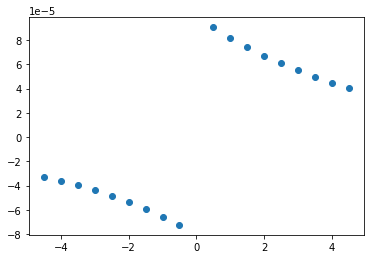

In [24]:
# Draw the chart
plt.scatter(chart_data_x, chart_data_y)
